In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## Confidence Intervals ##

Suppose you have a large i.i.d. sample $X_1, X_2, \ldots, X_n$, and let $\bar{X}_n$ be the sample mean. The CLT implies that with chance about 95%, the sample mean is within 2 SDs of the population mean:

$$
P\big{(}\bar{X}_n \in (\mu - 2\frac{\sigma}{\sqrt{n}}, ~~~ \mu + 2\frac{\sigma}{\sqrt{n}}) \big{)} ~ \approx ~~ 0.95
$$

where $\mu = E(X_1)$ and $\sigma = SD(X_1)$ are fixed but possibly unknown parameters.

In [2]:
# VIDEO: 95% Confidence Interval for Population Mean

from IPython.display import YouTubeVideo

YouTubeVideo('-t8E1SW0wsg')

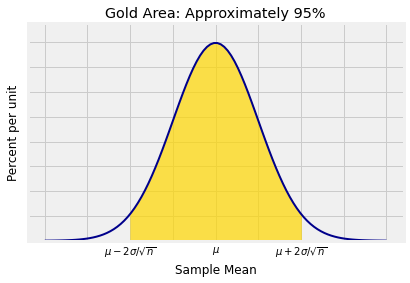

In [3]:
# NO CODE
Plot_norm(x_limits=(-4, 4), mu=0, sigma=1, left_end=-2, right_end=2)
plt.yticks(np.arange(0, 0.401, 0.05), '')
plt.xticks(np.arange(-4, 4.1),['','','$\mu - 2\sigma/\sqrt{n}$', '', '$\mu$', '', '$\mu+2\sigma/\sqrt{n}$','', ''])
plt.xlabel('Sample Mean')
plt.title('Gold Area: Approximately 95%');

This can be expressed in a different way:

$$
P\big{(}\vert \bar{X}_n - \mu \vert < 2\frac{\sigma}{\sqrt{n}}\big{)} ~ \approx ~~ 0.95
$$

Distance is symmetric, so this is the same as saying:

$$
P\big{(}\mu \in (\bar{X}_n - 2\frac{\sigma}{\sqrt{n}}, ~~~ \bar{X}_n + 2\frac{\sigma}{\sqrt{n}})\big{)} ~ \approx ~~ 0.95
$$

That is why the interval "sample mean $\pm$ 2 measures of spread" is used as an interval of estimates of $\mu$.

The interval $\bar{X}_n \pm ~ 2 \sigma/\sqrt{n}$ is called *an approximate 95% confidence interval for the parameter $\mu$*, the population mean. The interval has a *confidence level* of 95%. The level determines the use of $z = 2$ as the multiplier of the SD of the sample mean.

```{admonition} Quick Check
True or false: Under the assumptions and notation used above, the interval $\bar{X}_n \pm 2\frac{\sigma}{\sqrt{n}}$ is an approximate 95% confidence interval for the sample mean.

```

```{admonition} Answer
:class: dropdown
False

```

### Changing the Confidence Level ###
You could choose a different confidence level, say 80%. With that choice you would expect the interval to be narrower. To find out exactly how many SDs you have to go on either side of the center to pick up a central area of about 80%, you have to find the corresponding $z$ on the standard normal curve, as shown below.

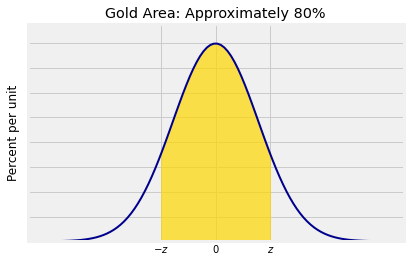

In [4]:
# NO CODE
Plot_norm(x_limits=(-4, 4), mu=0, sigma=1, left_end=-1.28, right_end=1.28)
plt.yticks(np.arange(0, 0.401, 0.05), '')
plt.xticks(make_array(-1.28, 0, 1.28),['$-z$', '0', '$z$'])
plt.title('Gold Area: Approximately 80%');

As you know from Data 8 and can see in the figure, the interval runs from the 10th percentile to the 90th percentile of the distribution. So $z$ is the 90th percentile of the standard normal curve.

In [5]:
stats.norm.ppf(.9)

1.2815515655446004

Therefore an approximate 80% confidence interval for the population mean $\mu$ is given by "sample mean $\pm ~ 1.28\sigma/\sqrt{n}$".

Let's double check that $2$ is a good choice of $z$ for a 95% interval. The $z$ that we need is the 97.5 percent point:

In [6]:
stats.norm.ppf(.975)

1.959963984540054

That's $z = 1.96$, which we have been calling $2$. It's good enough, but $z = 1.96$ is also commonly used for constructing 95% confidence intervals.

In [7]:
# VIDEO: Confidence Interval for Population Mean

YouTubeVideo('K7juQV1jezw')

### Confidence Interval for Population Mean ###
Let $\lambda$% be any confidence level. Let $z_\lambda$ be the point such that the interval $(-z_\lambda, ~ z_\lambda)$ contains $\lambda$% of the area under the standard normal curve. In our example above, $\lambda$ was 80 and $z_\lambda$ was 1.28. 

Let $p = \lambda/100$ be the value of $\lambda$ converted into a proportion. For example if $\lambda = 80$ then $p = 0.8$. Then

$$
z_\lambda ~ = ~ \Phi^{-1}(p + 0.5(1-p))
$$

because all of the area to the left of $z_\lambda$ is the area $p$ between $z_\lambda$ and $-z_\lambda$ plus the tail to the left of $-z_\lambda$. 

If $n$ is large,

$$
p ~ \approx ~ 
P\big{(}\mu \in (\bar{X}_{n} - z_{\lambda} \frac{\sigma}{\sqrt{n}}, ~~~ \bar{X}_n + z_\lambda \frac{\sigma}{\sqrt{n}})\big{)}
$$

The random interval $\bar{X}\_{n} ~ \pm ~ z_{\lambda} \sigma/\sqrt{n}$ is called *an approximate $\lambda$% confidence interval for the population mean $\mu$*. There is about a $\lambda$% chance that this random interval contains the parameter $\mu$.

The only difference between confidence intervals of different levels is the choice of $z_\lambda$ which depends on the level $\lambda$. The other two components are the sample mean and its SD.

### A Data 8 Example Revisited ###
Let's return to an example very familiar from Data 8: a random sample of 1,174 pairs of mothers and their newborns.

In [8]:
baby = Table.read_table('baby.csv')

In [9]:
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


The third column consists of the ages of the mothers. Let's construct an approximate 95% confidence interval for the mean age of mothers in the population. We did this in Data 8 using the bootstrap, so we will be able to compare results.

We can apply the methods of this section because our data come from a large random sample.

In [10]:
ages = baby.column('Maternal Age')

samp_mean = np.mean(ages)
samp_mean

27.228279386712096

In [11]:
n = baby.num_rows
n

1174

The observed value of $\bar{X}_n$ in the sample is 27.23 years. We know that $n = 1174$, so all we need is the population SD $\sigma$ and then we can complete our calculation.

But of course we don't know the population SD $\sigma$. We only have a sample.

As data scientists, we are used to lifting ourselves by our own bootstraps. Notice that the SD of the sample mean is $\sigma/\sqrt{n}$. If we estimate $\sigma$ by the SD of the data, there will be some error in the estimate but the error will be divided by $\sqrt{n}$ and therefore won't have much effect. 

That means we can use "sample SD divided by $\sqrt{n}$" as an estimate of $\sigma/\sqrt{n}$. 

The sample SD, our estimate of $\sigma$, is about 5.82 years.

In [12]:
sigma_estimate = np.std(ages)
sigma_estimate

5.815360404190897

An approximate 95% confidence interval for the mean birth weight of babies in the population is $(26.89, 27.57)$ years.

In [13]:
sd_sample_mean = sigma_estimate/(n ** 0.5)

ci_95_pop_mean = samp_mean + 1.96 * make_array(-1, 1) * sd_sample_mean
ci_95_pop_mean

array([26.89562086, 27.56093791])

No bootstrapping required! 

In [14]:
# VIDEO: Estimating the SD of the Sample Mean

YouTubeVideo('iPnAPZQgjkA')

Now let's compare our interval to the interval we got in Data 8 by using the bootstrap percentile method. Here is the function `bootstrap_mean` from Data 8.

In [15]:
def bootstrap_mean(original_sample, label, replications):
    
    """Displays approximate 95% confidence interval for population mean.
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    just_one_column = original_sample.select(label)
    n = just_one_column.num_rows
    
    means = make_array()
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample()
        resampled_mean = np.mean(bootstrap_sample.column(0))
        means = np.append(means, resampled_mean)
        
    left = percentile(2.5, means)
    right = percentile(97.5, means)
    
    resampled_means = Table().with_column(
    'Bootstrap Sample Mean', means
    )
    resampled_means.hist(bins=15)
    print('Approximate 95% confidence interval for population mean:')
    print(np.round(left, 2), 'to', np.round(right, 2))
    plt.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);

Let's construct a bootstrap 95% confidence interval for the population mean. We will use 5000 bootstrap samples as we did in Data 8.

Approximate 95% confidence interval for population mean:
26.9 to 27.56


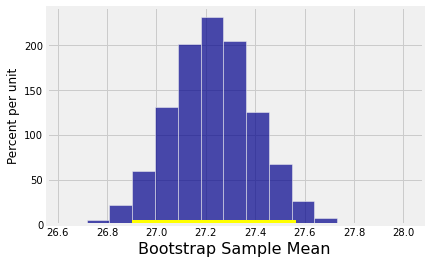

In [16]:
bootstrap_mean(baby, 'Maternal Age', 5000)

The bootstrap confidence interval is essentially identical to the interval (26.89, 27.57) that we got by using the normal approximation.

As we did in Data 8, let's observe that the distribution of maternal ages in the sample is far from normal:

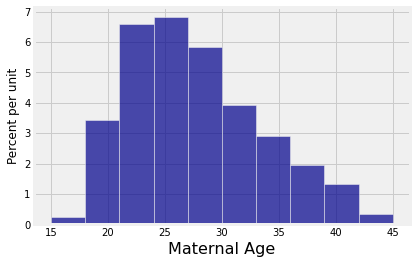

In [17]:
baby.select('Maternal Age').hist()

But the empirical distribution of the sample mean, displayed as the output of the previous cell, is roughly bell shaped. That is because the probability distribution of the mean of the large sample *is* approximately normal by the Central Limit Theorem, even though the distribution of the population is skewed.

**Note on the bootstrap** 

Why did we use the bootstrap for creating confidence intervals in Data 8, if the intervals can be calculated as simply as in this section?

The reason is that the methods of this section apply only to confidence intervals for the population mean, based on large i.i.d. samples. If you want to estimate a population median instead, as we did in Data 8, then the simple method above doesn't work. The calculation and estimation of the SD is harder. But the bootstrap takes care of that for us by using resampling to find the variability in our estimates. It allows us to construct confidence intervals in some situations where theoretical methods are intractable. 

The bootstrap is a powerful process. However, if all we are doing is estimating a population mean, the methods of this section are simpler.